# **Image Processing with Computer Vision**

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = cv.imread('/content/sample_data/stevejobs.jpg')
img.shape

(422, 487, 3)

In [3]:
img.size

616542

In [4]:
img.dtype

dtype('uint8')

In [5]:
img

array([[[28,  7, 10],
        [28,  7, 10],
        [27,  6,  9],
        ...,
        [28,  7, 10],
        [28,  7, 10],
        [28,  7, 10]],

       [[28,  7, 10],
        [28,  7, 10],
        [28,  7, 10],
        ...,
        [28,  7, 10],
        [28,  7, 10],
        [28,  7, 10]],

       [[28,  7, 10],
        [28,  7, 10],
        [28,  7, 10],
        ...,
        [28,  7, 10],
        [28,  7, 10],
        [28,  7, 10]],

       ...,

       [[17, 12, 13],
        [13, 13, 13],
        [ 5, 16, 14],
        ...,
        [57, 15, 16],
        [57, 15, 16],
        [57, 15, 16]],

       [[17, 12, 13],
        [14, 14, 14],
        [ 6, 17, 15],
        ...,
        [57, 15, 16],
        [57, 15, 16],
        [57, 15, 16]],

       [[18, 13, 14],
        [15, 15, 15],
        [ 6, 17, 15],
        ...,
        [57, 15, 16],
        [57, 15, 16],
        [57, 15, 16]]], dtype=uint8)

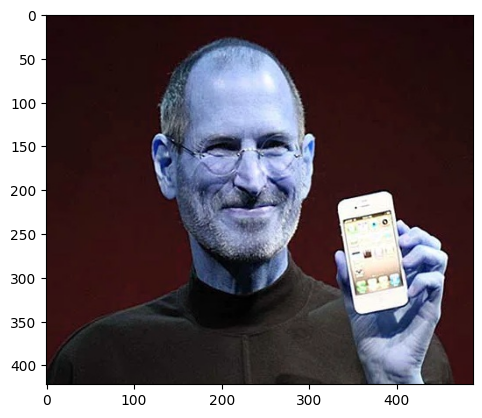

In [6]:
plt.imshow(img)

In [7]:
resized_img = cv.resize(img, (150,120))
resized_img.shape

(120, 150, 3)

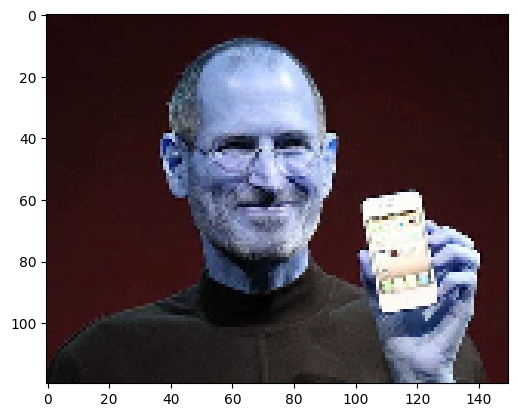

In [8]:
plt.imshow(resized_img)

In [10]:
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray_img.shape

(422, 487)

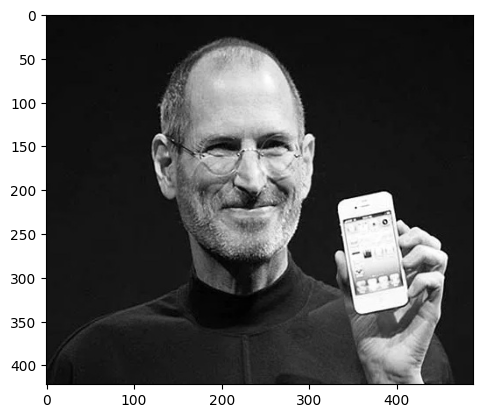

In [11]:
plt.imshow(gray_img, cmap='gray')

In [12]:
gray_img

array([[10, 10,  9, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10],
       ...,
       [13, 13, 14, ..., 20, 20, 20],
       [13, 14, 15, ..., 20, 20, 20],
       [14, 15, 15, ..., 20, 20, 20]], dtype=uint8)

**Padding**

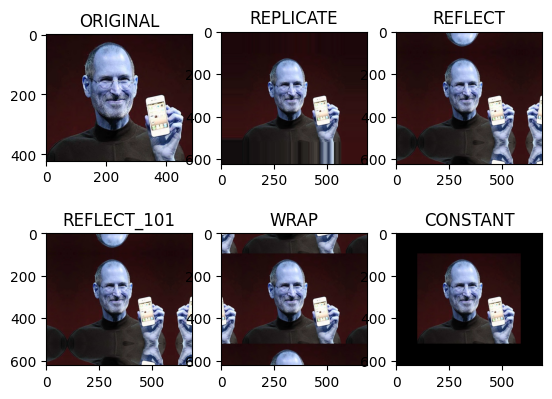

In [13]:
replicate = cv.copyMakeBorder(img,100,100,100,100,cv.BORDER_REPLICATE)
reflect = cv.copyMakeBorder(img,100,100,100,100,cv.BORDER_REFLECT)
reflect101 = cv.copyMakeBorder(img,100,100,100,100,cv.BORDER_REFLECT_101)
wrap = cv.copyMakeBorder(img,100,100,100,100,cv.BORDER_WRAP)
constant= cv.copyMakeBorder(img,100,100,100,100,cv.BORDER_CONSTANT)

plt.subplot(231),plt.imshow(img,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')

plt.show()

In [14]:
flags = [i for i in dir(cv) if i.startswith('COLOR_')]
print(flags)

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_BGGR2BGR', 'COLOR_BAYER_BGGR2BGRA', 'COLOR_BAYER_BGGR2BGR_EA', 'COLOR_BAYER_BGGR2BGR_VNG', 'COLOR_BAYER_BGGR2GRAY', 'COLOR_BAYER_BGGR2RGB', 'COLOR_BAYER_BGGR2RGBA', 'COLOR_BAYER_BGGR2RGB_EA', 'COLOR_BAYER_BGGR2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GBRG2BGR', 'COLOR_BAYER_GBRG2BGRA', 'COLOR_BAYER_GBRG2BGR_EA', 'COLOR_BAYER_GBRG2BGR_VNG', 'COLOR_BAYER_GBRG2GRAY', 'COLOR_BAYER_GBRG2RGB', 'COLOR_BAYER_GBRG2RGBA', 'COLOR_BAYER_GBRG2RGB_EA', 'COLOR_BAYER_GBRG2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_

In [15]:
len(flags)

346

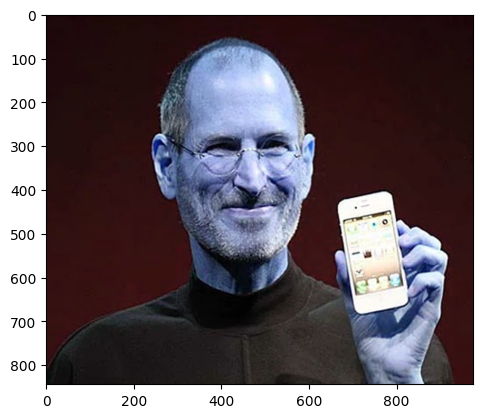

In [16]:
res = cv.resize(img,None,fx=2, fy=2, interpolation = cv.INTER_CUBIC)
plt.imshow(res)

**Translation**

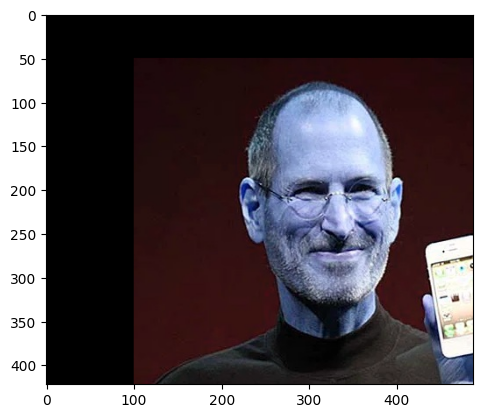

In [20]:
M = np.float32([[1,0,100],[0,1,50]])
rows, cols = img.shape[0], img.shape[1]
dst = cv.warpAffine(img,M,(cols,rows))
plt.imshow(dst)

**Rotation**

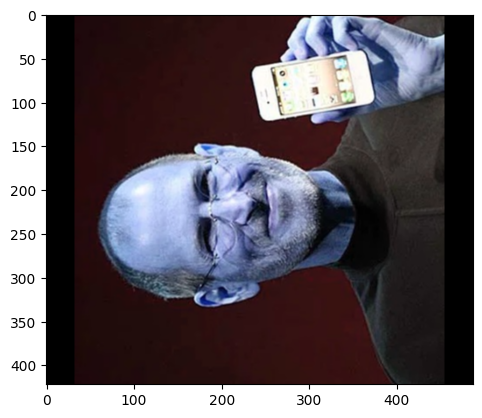

In [22]:
#cv.getRotationMatrix2D(center, angle, scale) 
M = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),90,1)
rot = cv.warpAffine(img,M,(cols,rows))
plt.imshow(rot)

**Affine Transformation**

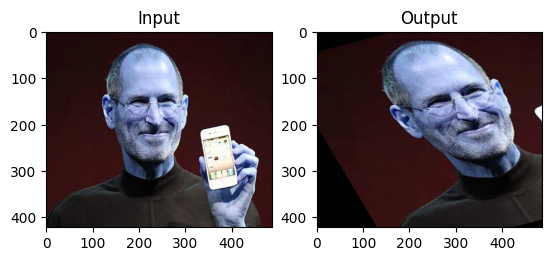

In [23]:
#Affine transformation matrix is a 2x3 matrix
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = cv.getAffineTransform(pts1,pts2)
affine_trans = cv.warpAffine(img,M,(cols,rows))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(affine_trans),plt.title('Output')
plt.show()

**Perspective Transformation**

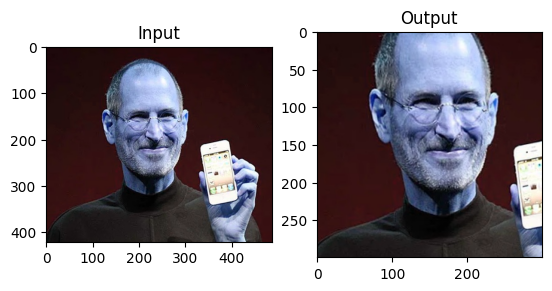

In [30]:
#Perspective transformation matrix is a 3x3 matrix
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv.getPerspectiveTransform(pts1,pts2)
persp_trans = cv.warpPerspective(img,M,(300,300))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(persp_trans),plt.title('Output')
plt.show()

**Image Thresholding**

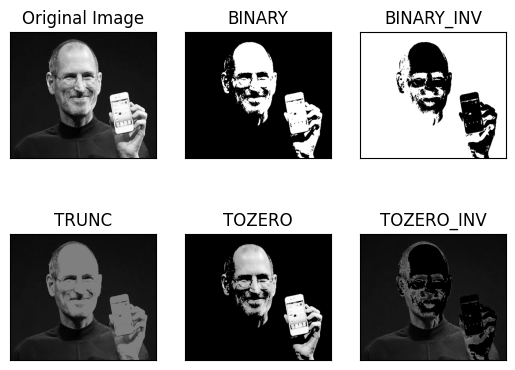

In [33]:
#Image must be gray scale image for thresholding

#The method returns two outputs. The first is the threshold that was used and the 
#second output is the thresholded image.

ret,thresh1 = cv.threshold(gray_img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(gray_img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(gray_img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(gray_img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(gray_img,127,255,cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [gray_img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])

plt.show()

**Smoothing Images**

(([], []), ([], []))

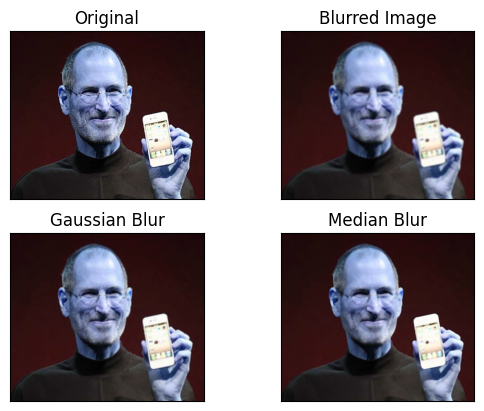

In [43]:
blur = cv.blur(img,(5,5))
gauss_blur = cv.GaussianBlur(img,(5,5),0)
median_blur = cv.medianBlur(img,5)

plt.subplot(221), plt.imshow(img), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(blur), plt.title('Blurred Image')
plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(gauss_blur), plt.title('Gaussian Blur')
plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(median_blur), plt.title('Median Blur')
plt.xticks([]), plt.yticks([])

**Image Gradients**

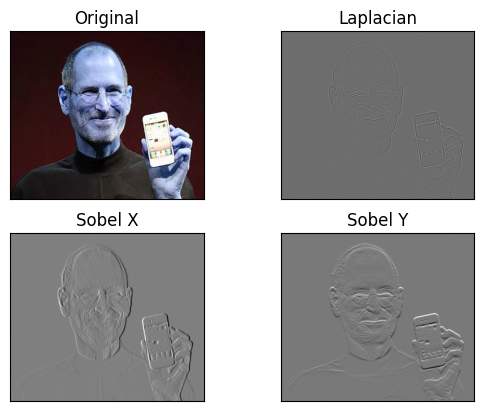

In [47]:
laplacian = cv.Laplacian(gray_img, cv.CV_64F)
sobelx = cv.Sobel(gray_img, cv.CV_64F, 1, 0, ksize=5)
sobely = cv.Sobel(gray_img, cv.CV_64F, 0, 1, ksize=5)

plt.subplot(2,2,1),plt.imshow(img, cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian, cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx, cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely, cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

**Canny Edge Detection**

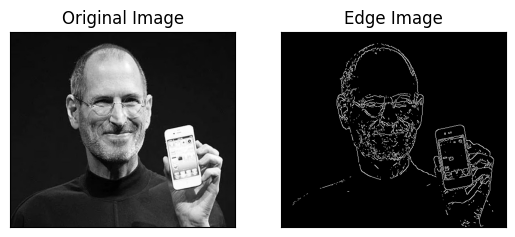

In [50]:
canny_edge = cv.Canny(gray_img, 200, 200)

plt.subplot(121),plt.imshow(gray_img, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(canny_edge, cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()